In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

True

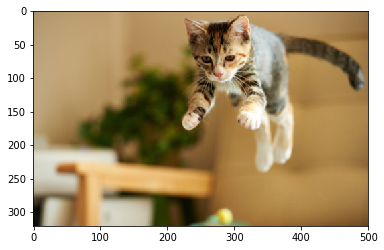

In [2]:
%matplotlib inline
image = cv2.imread("index.png")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)
cv2.imwrite('test_write.jpg',image)

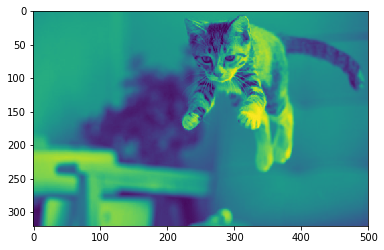

In [3]:
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image)

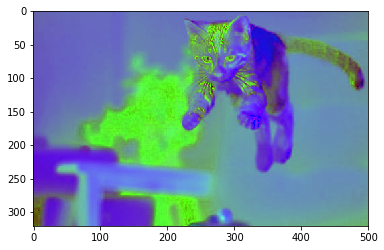

In [4]:
hsv_image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
plt.imshow(hsv_image)

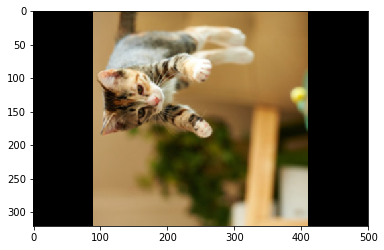

In [5]:
rows,cols = image.shape[:2]
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1) 
dst = cv2.warpAffine(image,M,(cols,rows)) 
plt.imshow(dst)


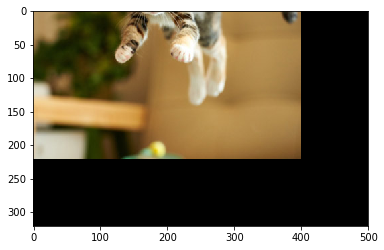

In [6]:
M = np.float32([[1,0,-100],[0,1,-100]]) 
dst = cv2.warpAffine(image,M,(cols,rows)) 
plt.imshow(dst)

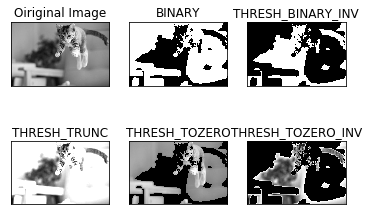

In [7]:
gray_image = cv2.imread('index.png',0)

ret,thresh_binary = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)
ret,thresh_binary_inv = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY_INV)
ret,thresh_trunc = cv2.threshold(gray_image,127,255,cv2.THRESH_TRUNC)
ret,thresh_tozero = cv2.threshold(gray_image,127,255,cv2.THRESH_TOZERO)
ret,thresh_tozero_inv = cv2.threshold(gray_image,127,255,cv2.THRESH_TOZERO_INV)

names = ['Oiriginal Image','BINARY','THRESH_BINARY_INV','THRESH_TRUNC','THRESH_TOZERO','THRESH_TOZERO_INV']
images = gray_image,thresh_binary,thresh_binary_inv,thresh_trunc,thresh_tozero,thresh_tozero_inv

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

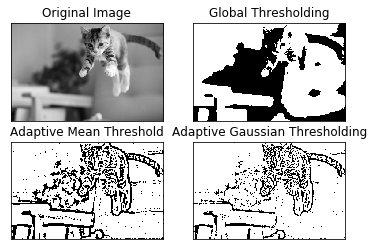

In [17]:
gray_image = cv2.imread('index.png',0)

ret,thresh_global = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)
#here 11 is the pixel neighbourhood that is used to calculate the threshold value
thresh_mean = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)

thresh_gaussian = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

names = ['Original Image','Global Thresholding','Adaptive Mean Threshold','Adaptive Gaussian Thresholding']
images = [gray_image,thresh_global,thresh_mean,thresh_gaussian]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

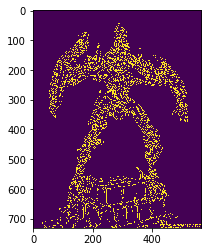

In [18]:
edges = cv2.Canny(image,100,200) 
plt.imshow(edges)